### Package Imports

In [1]:
#Package imports
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import utils
sns.set_style('darkgrid')
from pandas_datareader import data #Package for pulling data from the web
from datetime import date
from fbprophet import Prophet 

### Pulling in Data

In [2]:
#Pulling in the tickers and economic predicators we're interested in
#ONLN = Online Retail ETF, FTXD = Nasdaq Retail ETF, XLY = S&P Consumer Discretionary ETF, 
#IYK iShares US Consumer Goods ETF, AMZN = Amazon, EBAY = Ebay, FB = Facebook
#JETS = Global Airline ETF (Recovery trade), XOP = S&P O&G Exploration and Production ETF (Recovery Trade)
#GOVT = US T-Bond ETF, CL=F = Crude, GC=F = Gold, SI=F = Silver, HG=F = Copper, ^VIX = CBOE Vix
tickers = ['PINS','SPY','ONLN','FTXD','XLY','IYK','AMZN','EBAY','FB','JETS','XOP','GOVT','CL=F','GC=F','SI=F','HG=F','^VIX']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_df= data.DataReader(tickers, 
                       start='2020-06-01', #start date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Dropping missing vals
etf_df = etf_df.dropna()

#Checking the 5 most recent values
etf_df.head(5)

Symbols,PINS,SPY,ONLN,FTXD,XLY,IYK,AMZN,EBAY,FB,JETS,XOP,GOVT,CL=F,GC=F,SI=F,HG=F,^VIX
Date,,,,,,,,,,,,,,,,,
2020-06-01,20.430000,300.727325,47.061333,22.806717,124.384163,124.547218,2471.040039,44.784370,231.910004,15.663684,52.179771,27.450247,35.439999,1737.800049,18.768000,2.4745,28.230000
2020-06-02,20.510000,303.217377,47.979267,23.245361,125.445747,125.029533,2472.409912,45.557198,232.720001,16.003548,53.997604,27.401089,36.810001,1725.199951,18.207001,2.4945,26.840000
2020-06-03,21.440001,307.252716,48.364208,23.574844,127.816948,126.417442,2478.399902,46.022877,230.160004,17.173077,55.053127,27.292938,37.290001,1697.800049,17.921000,2.4965,25.660000
2020-06-04,21.200001,306.445618,48.216148,23.496445,127.172058,125.551239,2460.600098,48.906116,226.289993,19.162273,55.707935,27.194620,37.410000,1718.900024,18.024000,2.4930,25.809999
2020-06-05,22.129999,314.299652,48.620831,24.085939,130.217911,128.179398,2483.000000,48.371082,230.770004,20.081903,62.275612,27.106134,39.549999,1676.199951,17.443001,2.5570,24.520000


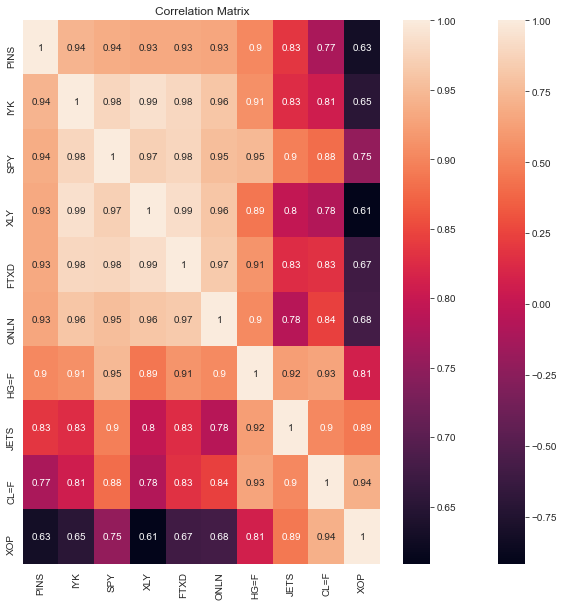

In [14]:
#Creating correlation matrix
corr_mat = etf_df.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr_mat)

#Quantifying the Correlation Matrix
i = 10
columns = corr_mat.nlargest(i,'PINS')['PINS'].index
corrmat = np.corrcoef(etf_df[columns].values.T)
heatmap = sns.heatmap(corrmat,
            cbar=True,
            annot=True, 
            xticklabels = columns.values,
            yticklabels = columns.values)
ax.set_title('Correlation Matrix')
plt.show()

### Forecasting Predicator Variables Individually

In [4]:
#Creating dfs to model with

#IYK, JETS, GOVT

#Regressor 1 (IYK)
reg1_prophet = pd.DataFrame()
reg1_prophet['ds'] = etf_df.index
reg1_prophet['y'] = etf_df['IYK'].values

#Regressor 2 (JETS)
reg2_prophet = pd.DataFrame()
reg2_prophet['ds'] = etf_df.index
reg2_prophet['y'] = etf_df['JETS'].values

#Regressor 3 (GOVT)
reg3_prophet = pd.DataFrame()
reg3_prophet['ds'] = etf_df.index
reg3_prophet['y'] = etf_df['GOVT'].values

### Fitting Models

In [5]:
#Pred 1
reg1_m = Prophet()
reg1_m.fit(reg1_prophet)
reg1_future = reg1_m.make_future_dataframe(freq='m', periods=3);

#Pred 2
reg2_m = Prophet()
reg2_m.fit(reg2_prophet)
reg2_future = reg2_m.make_future_dataframe(freq='m', periods=3);

#Pred 3
reg3_m = Prophet()
reg3_m.fit(reg3_prophet)
reg3_future = reg3_m.make_future_dataframe(freq='m', periods=3);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Creating Forecast for Next 6 Months of Predicator Variables

In [6]:
#Defining length of forecast
future_pred_length = reg1_m.make_future_dataframe(freq='m',periods = 3)

#Pred 1
reg1_forecast = reg1_m.predict(future_pred_length)   
reg1_pred = pd.DataFrame(reg1_forecast['trend'].values)

#Pred 2
reg2_forecast = reg2_m.predict(future_pred_length)
reg2_pred = pd.DataFrame(reg2_forecast['trend'].values)

#Pred 3
reg3_forecast = reg3_m.predict(future_pred_length)
reg3_pred = pd.DataFrame(reg3_forecast['trend'].values)

In [7]:
#Combining predicators into one df
frames = [future_pred_length,reg1_pred,reg2_pred,reg3_pred]
predicator_forecast = pd.concat(frames,axis=1)
predicator_forecast.columns = ['ds','Reg_1','Reg_2','Reg_3']
predicator_forecast.head()

,ds,Reg_1,Reg_2,Reg_3
0,2020-06-01,123.756514,17.266050,27.282715
1,2020-06-02,123.928779,17.248806,27.290906
2,2020-06-03,124.101044,17.231561,27.299098
3,2020-06-04,124.273309,17.214317,27.307289
4,2020-06-05,124.445573,17.197073,27.315481


### Forecasting ETF Performance with Predicator Variables

In [8]:
#Creating dfs to train model with (FB Prophet format)
etf_prophet = pd.DataFrame()
etf_prophet['ds'] = etf_df.index
etf_prophet['y'] = etf_df['PINS'].values
etf_prophet['Reg_1'] = etf_df['IYK'].values
etf_prophet['Reg_2'] = etf_df['JETS'].values
etf_prophet['Reg_3'] = etf_df['GOVT'].values

In [9]:
#Checking Prophet df
etf_prophet.head()

,ds,y,Reg_1,Reg_2,Reg_3
0,2020-06-01,20.430000,124.547218,15.663684,27.450247
1,2020-06-02,20.510000,125.029533,16.003548,27.401089
2,2020-06-03,21.440001,126.417442,17.173077,27.292938
3,2020-06-04,21.200001,125.551239,19.162273,27.194620
4,2020-06-05,22.129999,128.179398,20.081903,27.106134


In [10]:
#Defining model, adding additional regressors and fitting model
m = Prophet()
m.add_regressor('Reg_1')
m.add_regressor('Reg_2')
m.add_regressor('Reg_3')
m.fit(etf_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
#Forecasting the next 90 days
etf_forecast = m.predict(predicator_forecast) 
etf_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Reg_1,Reg_1_lower,Reg_1_upper,Reg_2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
207,2021-03-30,73.237708,68.335125,79.135148,73.237708,73.237708,1.177078,1.177078,1.177078,6.206449,...,0.464663,0.464663,0.464663,0.208245,0.208245,0.208245,0.0,0.0,0.0,73.910616
208,2021-03-31,73.253931,68.378814,79.019853,73.253931,73.253931,1.172473,1.172473,1.172473,6.263998,...,0.420912,0.420912,0.420912,0.229999,0.229999,0.229999,0.0,0.0,0.0,73.904843
209,2021-04-30,73.740643,67.976029,78.933515,73.036777,74.490291,1.034314,1.034314,1.034314,7.990463,...,-0.891615,-0.891615,-0.891615,0.749464,0.749464,0.749464,0.0,0.0,0.0,73.598491
210,2021-05-31,74.243577,65.839613,78.110504,71.770286,76.511041,0.891549,0.891549,0.891549,9.774477,...,-2.247893,-2.247893,-2.247893,-0.153211,-0.153211,-0.153211,0.0,0.0,0.0,71.842473
211,2021-06-30,74.730289,64.637021,78.551879,70.240948,79.299881,0.753390,0.753390,0.753390,11.500942,...,-3.560420,-3.560420,-3.560420,0.229999,0.229999,0.229999,0.0,0.0,0.0,71.399867


Text(0.5, 1.0, '3 Month PINS Forecast [HIMS]')

<Figure size 1440x720 with 0 Axes>

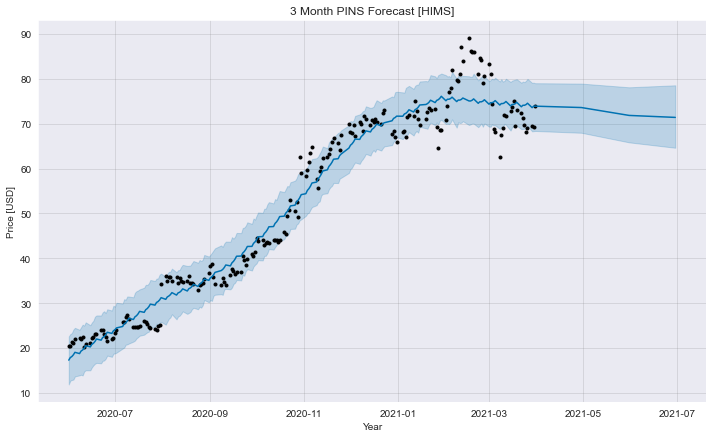

In [15]:
#Visualizing forecast
plt.figure(figsize = (20,10))
m.plot(etf_forecast, xlabel='Year',ylabel ='Price [USD]');
plt.title('3 Month PINS Forecast [PINS]')

<Figure size 1440x720 with 0 Axes>

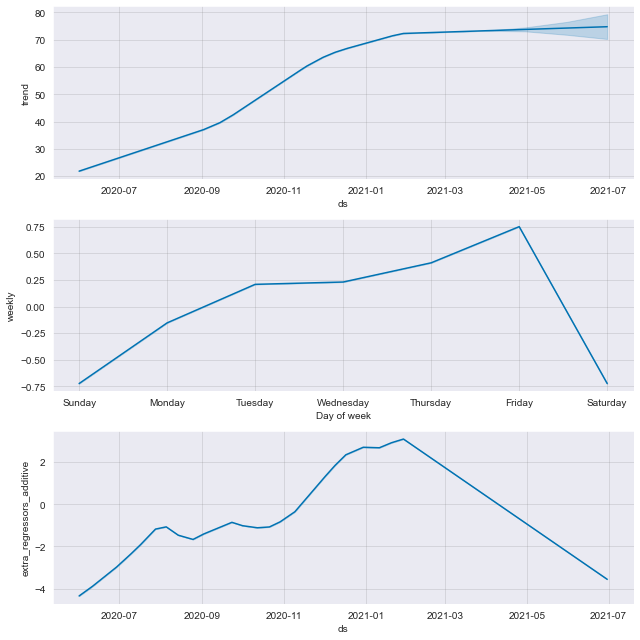

In [16]:
#Plotting forecast components
plt.figure(figsize = (20,10))
m.plot_components(etf_forecast);